####Step 1: Data Preprocessing
####Step 2: Data exploring and data visualization
####Step 3: Spliting the Data into Train and Test
####Step 4: Applying the alogrithm  using k fold
####Step 5: Finding accuracy, specificity 

Importing Libraries

In [ ]:
#For Avoding the warning
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
#Upload file into google colab session
from google.colab import files
#Multidimensional array objects and a collection of routines for processing those arrays
import numpy as np
#For data analysis and data manipulation
import pandas as pd
#For 2D Graph
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
#For 3D Graph
import seaborn as sns
import plotly.express as px
from scipy import stats
#Spliting the data into train and test using sklearn library
from sklearn.model_selection import train_test_split 
#Feature scaling using the sklearn library
from sklearn.preprocessing import StandardScaler
#Sklearn for SVC
from sklearn.svm import SVC
#Using metrics for confusion matrix, getting the accuracy score
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score
#Using k fold cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

Reading the CSV File

In [ ]:
#Uploading the file
file = files.upload() 
#Reading the csv File
Ionosphere_Data = pd.read_csv("Ionosphere Data.csv") 
#Printing the top 5 rows from dataframe
Ionosphere_Data.head()

Saving Ionosphere Data.csv to Ionosphere Data.csv


,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


Data Preprocessing

In [ ]:
#Getting how many rows and columns
Ionosphere_Data.shape

(351, 35)

In [ ]:
#Getting the information of each feature
Ionosphere_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

In [ ]:
#Checking the null values
Ionosphere_Data.isnull().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [ ]:
#Getting the Statistical Information
Ionosphere_Data.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Data Exploring and Visualing

In [ ]:
#Get count of number of M or B cells in diagnosis
Ionosphere_Data['label'].value_counts()

g    225
b    126
Name: label, dtype: int64

In [ ]:
#Grouping the type of glass and taking the count
df = pd.DataFrame(Ionosphere_Data.groupby(by = ['label']).size().reset_index(name = 'count'))
#Getting count of type of glass
fig = px.pie(df, values="count" , names ="label",color_discrete_sequence = px.colors.sequential.Viridis, template = "plotly_dark")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',title = 'Count of Diagnosis')
fig.show()

Relationship between label and some Feature

In [ ]:
df = Ionosphere_Data.copy()

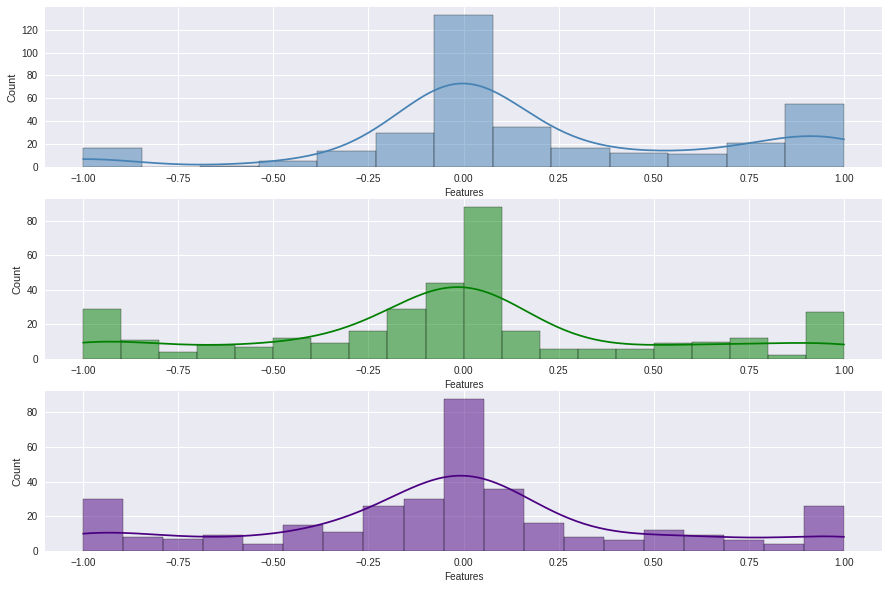

In [ ]:
#Setting the subplot figure size
plt.style.use("seaborn")
fig, ax =plt.subplots(3,1, figsize=(15,10)) 
#Histplot for RI
sns.histplot(x = df["feature10"], kde=True, ax=ax[0], color="steelblue");
ax[0].set_xlabel("Features",fontsize=10);
#Histplot for Na
sns.histplot(x = df["feature20"], kde=True, ax=ax[1], color="green");
ax[1].set_xlabel("Features",fontsize=10);
#Histplot for Mg
sns.histplot(x = df["feature30"], kde=True, ax=ax[2], color="indigo");
ax[2].set_xlabel("Features",fontsize=10);

With this 3 histplot, we can see none of the label is normally distributed 

Scatterplot of some correlated features.

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning:

An input array is constant; the correlation coefficent is not defined.



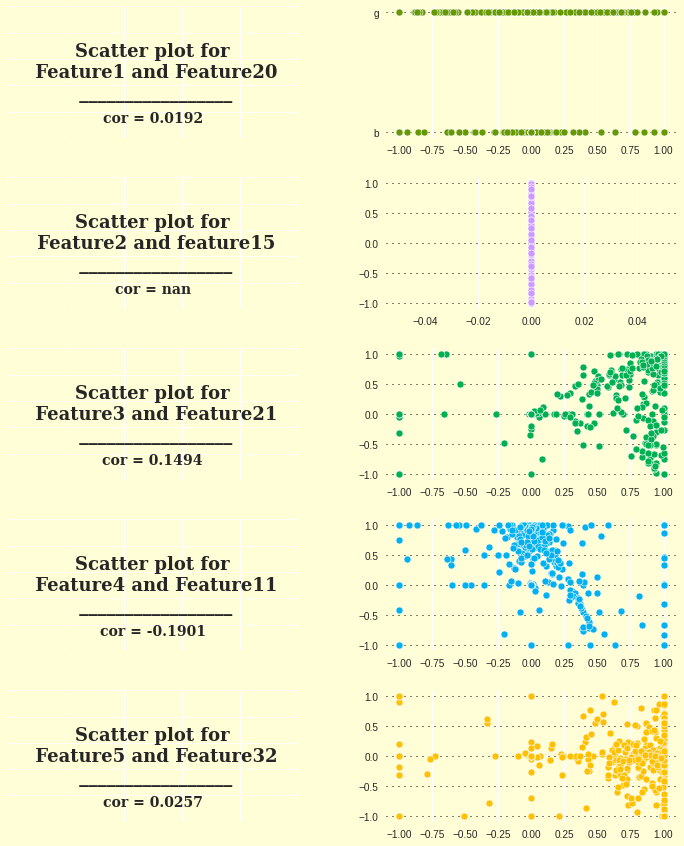

In [ ]:
background_color = '#FFFED7'
color_palette = ['#669900', '#CC99FF', '#00B050', '#00B0F0', '#FFC000', '#00FF00', '#002060', '#FF00FF', '#6600CC']
fig = plt.figure(figsize=(12, 15))
gs = fig.add_gridspec(5, 2)
gs.update(wspace=0.3, hspace=0.3)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])
ax6 = fig.add_subplot(gs[3, 0])
ax7 = fig.add_subplot(gs[3, 1])
ax8 = fig.add_subplot(gs[4, 0])
ax9 = fig.add_subplot(gs[4, 1])

axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]
fig.patch.set_facecolor(background_color)


# Feature
cor = round(stats.pearsonr(df['feature1'], df['feature20'])[0], 4)
ax0.text(0.5, 0.5,
        'Scatter plot for\n Feature1 and Feature20\n _________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontfamily='serif',
        fontweight='bold')
ax0.text(0.5, 0.15,
        'cor = ' + str(cor),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=14, fontfamily='serif',
        fontweight='bold')

ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.scatterplot(x='feature20', y='label', data=df, ax=ax1, color=color_palette[0])


# Feature
cor = round(stats.pearsonr(df['feature2'], df['feature15'])[0], 4)
ax2.text(0.5, 0.5,
        'Scatter plot for\n Feature2 and feature15\n _________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontfamily='serif',
        fontweight='bold')
ax2.text(0.5, 0.15,
        'cor = ' + str(cor),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=14, fontfamily='serif',
        fontweight='bold')

ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.scatterplot(x='feature2', y='feature15', data=df, ax=ax3, color=color_palette[1])


# Feature
cor = round(stats.pearsonr(df['feature3'], df['feature21'])[0], 4)
ax4.text(0.5, 0.5,
        'Scatter plot for\n Feature3 and Feature21\n _________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontfamily='serif',
        fontweight='bold')
ax4.text(0.5, 0.15,
        'cor = ' + str(cor),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=14, fontfamily='serif',
        fontweight='bold')

ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.scatterplot(x='feature3', y='feature21', data=df, ax=ax5, color=color_palette[2])


# Feature
cor = round(stats.pearsonr(df['feature4'], df['feature11'])[0], 4)
ax6.text(0.5, 0.5,
        'Scatter plot for\n Feature4 and Feature11\n _________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontfamily='serif',
        fontweight='bold')
ax6.text(0.5, 0.15,
        'cor = ' + str(cor),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=14, fontfamily='serif',
        fontweight='bold')

ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.scatterplot(x='feature4', y='feature11', data=df, ax=ax7, color=color_palette[3])


# Phenols and Wine
cor = round(stats.pearsonr(df['feature5'], df['feature32'])[0], 4)
ax8.text(0.5, 0.5,
        'Scatter plot for\n Feature5 and Feature32\n _________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontfamily='serif',
        fontweight='bold')
ax8.text(0.5, 0.15,
        'cor = ' + str(cor),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=14, fontfamily='serif',
        fontweight='bold')

ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.scatterplot(x='feature5', y='feature32', data=df, ax=ax9, color=color_palette[4])



for ax in axes:
    ax.set_facecolor(background_color)
    ax.set_xlabel('')
    ax.set_ylabel('')
    for s in ['top', 'right']:
        ax.spines[s].set_visible(False)

for ax in [ax0, ax2, ax4, ax6, ax8]:
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(left=False, bottom=False)
    for s in ['left', 'bottom']:
        ax.spines[s].set_visible(False)

In [ ]:
df.columns

Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
       'feature7', 'feature8', 'feature9', 'feature10', 'feature11',
       'feature12', 'feature13', 'feature14', 'feature15', 'feature16',
       'feature17', 'feature18', 'feature19', 'feature20', 'feature21',
       'feature22', 'feature23', 'feature24', 'feature25', 'feature26',
       'feature27', 'feature28', 'feature29', 'feature30', 'feature31',
       'feature32', 'feature33', 'feature34', 'label'],
      dtype='object')

In [ ]:
df = df.iloc[:, : 10]

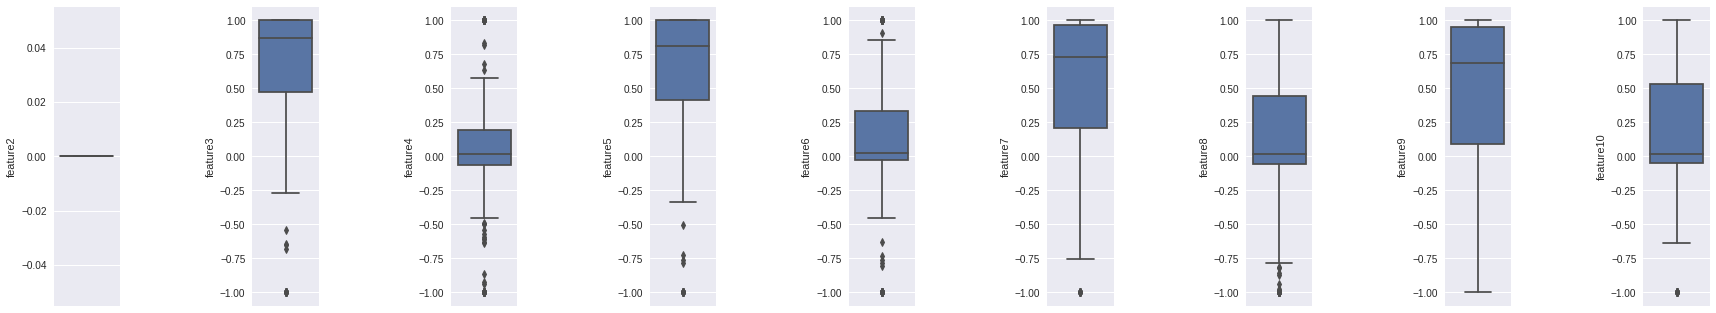

In [ ]:
data_to_plot = df.iloc[:, 1:]
fig, ax = plt.subplots(ncols=len(data_to_plot.columns))
plt.subplots_adjust(right=3, wspace=2)
for i, col in enumerate(data_to_plot.columns):
  sns.boxplot(y=data_to_plot[col], ax = ax[i])

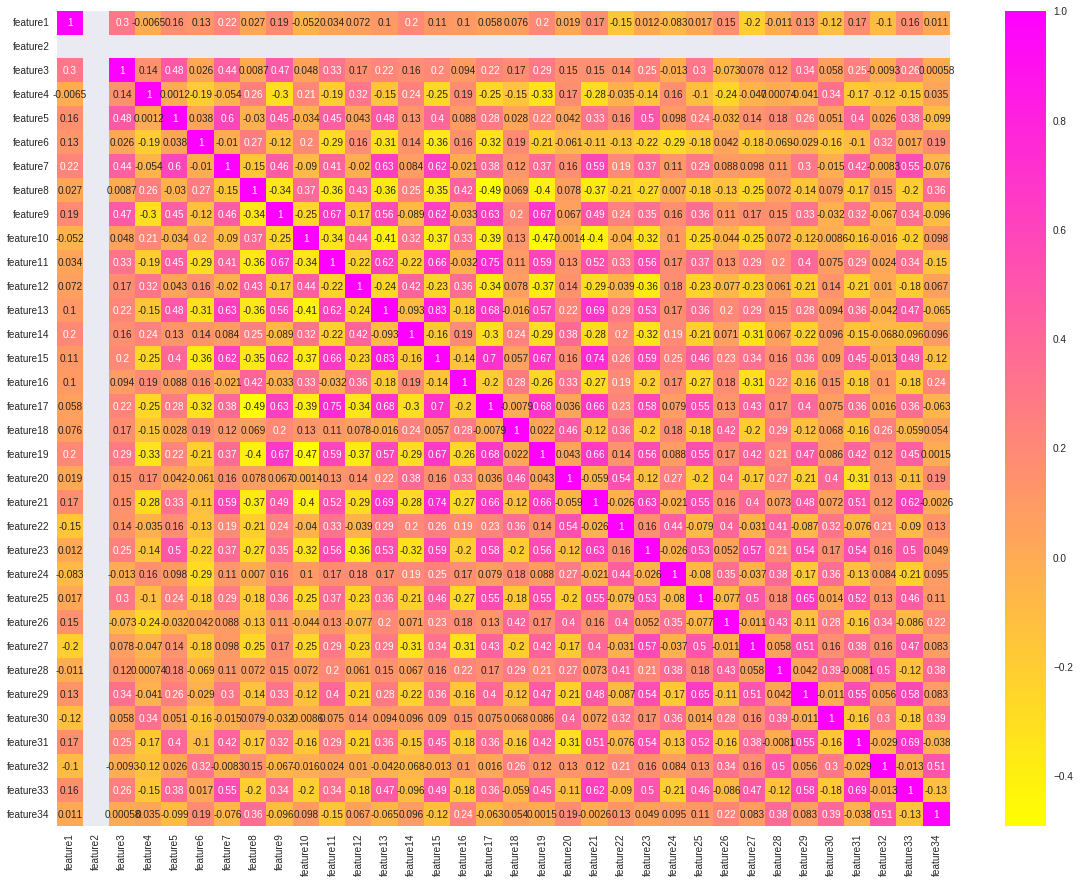

In [ ]:
from pandas._libs.tslibs.timestamps import integer_op_not_supported
#Seeing the correlation for each feature using the heatmap
fig, ax = plt.subplots(figsize=(20,15))
fig.patch.set_facecolor('white')
sns.heatmap(Ionosphere_Data.corr(), ax=ax, annot=True, cmap="spring_r")

Label Encoding for Categorical Variable

In [ ]:
#Encode the diagnosis values
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
Ionosphere_Data['label'] = labelencoder.fit_transform(Ionosphere_Data['label'])

Creating variable X and Y

In [ ]:
#Creating the variable x and y
x = Ionosphere_Data.drop('label', axis=1)
y = Ionosphere_Data['label']

In [ ]:
Ionosphere_Data

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1


Splitting the Data into Traning and testing data

In [ ]:
#split the data into train and test set
X_train, X_test, y_train, y_test= train_test_split(x, y,test_size = 0.2,shuffle = True,random_state = 0)  #shuffle the data to avoid bias
#printing the shape of x_train,x_test,y_train,y_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(280, 34)
(280,)
(71, 34)
(71,)


Featuring Scaling

In [ ]:
#Creating the variable for Standardscaler object
scaler = StandardScaler()
#Fit the model
scaler.fit(X_train)
#Making the transform for x train and x test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

In [ ]:
#Split dataset into k consecutive folds (without shuffling by default)
#Creating the variable num_folds for how many no. of folds
num_folds = 5
#t maintains the same class ratio throughout the K folds as the ratio in the original dataset.
kfold=StratifiedKFold(n_splits = num_folds)

In [ ]:
SVMClassifier = SVC(kernel = 'linear',gamma = 'scale', shrinking = False, probability=True)

In [ ]:
for train_index, test_index in kfold.split(x,y):
  SVMClassifier.fit(X_train, y_train)
  #Making the prediction on X_test
  y_pred = SVMClassifier.predict(X_test)
  #Making the prediction on X_train
  y_pred1 = SVMClassifier.predict(X_train)

In [ ]:
#comparing actual response values (y_train with predicted response values (y_pred1)
SVC_Train =  metrics.accuracy_score(y_train, y_pred1)*100
print("SVC model accuracy(in %) for Training:",SVC_Train)
#comparing actual response values (y_test) with predicted response values (y_pred)
SVC_Test = metrics.accuracy_score(y_test, y_pred)*100
print("SVC model accuracy(in %) for Testing:", SVC_Test)

SVC model accuracy(in %) for Training: 93.57142857142857
SVC model accuracy(in %) for Testing: 91.54929577464789


In [ ]:
##Confusion Matrix is the number of correct and incorrect predictions made by a classifier
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for SVC:")
print(result)
#Getting the classification report
result1 = classification_report(y_test, y_pred)
print("Classification Report for SVC :",)
print (result1)
#Overall accuracy
result2 = accuracy_score(y_test,y_pred)*100
print("Overall Accuracy For SVC :",result2)

Confusion Matrix for SVC:
[[24  6]
 [ 0 41]]
Classification Report for SVC :
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        30
           1       0.87      1.00      0.93        41

    accuracy                           0.92        71
   macro avg       0.94      0.90      0.91        71
weighted avg       0.93      0.92      0.91        71

Overall Accuracy For SVC : 91.54929577464789


In [ ]:
FP = result.sum(axis=0) - np.diag(result) 
FN = result.sum(axis=1) - np.diag(result)
TP = np.diag(result)
TN = result.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
total=sum(sum(result))
# Sensitivity, hit rate, recall, or true positive rate
TPR = ((TP/(TP+FN))).mean()*100
# Specificity or true negative rate
TNR = ((TN/(TN+FP))).mean()*100 

print('Sensitivity:' ,TPR)
print('Specificity: ' ,TNR)

Sensitivity: 90.0
Specificity:  90.0


In [1]:
probs = SVMClassifier.predict_proba(X_test)
preds = probs[:,1]

NameError: ignored

In [ ]:
roc = roc_auc_score(y_test, preds, average='weighted')*100
print('ROC Score:',roc)

ROC Score: 90.08130081300813


In [ ]:
f1=f1_score(y_test,y_pred,average='micro')*100
print('F1 Score:',f1)

F1 Score: 91.54929577464789


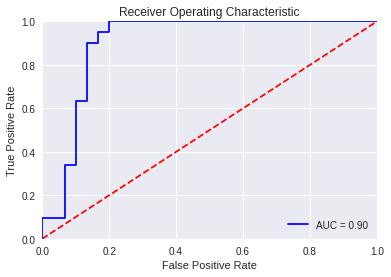

In [ ]:
probs = SVMClassifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
data = {'SVM Classifier':[result2,TNR,TPR,f1,roc]}
pd.DataFrame(data, index =['Total Accuracy','F1 score', 'Sensitivity','Specificity','ROC - AUC'])  

,SVM Classifier
Total Accuracy,91.549296
F1 score,90.000000
Sensitivity,90.000000
Specificity,91.549296
ROC - AUC,90.081301
